# Recursion

One of the most powerful concepts in programming is **recursion**: the idea of a function that calls itself. To avoid an infinite loop, a recursive function must have two key components:

- A **base case**: A simple condition where the function returns a value directly without calling itself.
- A **recursive step**: Where the function calls itself, but with an input that moves it closer to the base case.

A classic example is the factorial function, $n!$, which we can define recursively:

$$ 
n! = 
\begin{cases}
1 & \text{if } n = 0 \quad \text{(Base Case)} \\
n \cdot (n-1)! & \text{if } n > 0 \quad \text{(Recursive Step)}
\end{cases}
$$

Notice how for $n > 0$, the definition of $n!$ depends on a smaller version of itself, $(n-1)!$. This structure translates beautifully into a Julia function.

In [1]:
function recursive_factorial(n)
    # Base case: 0! is defined as 1. This is the anchor that stops the recursion.
    if n == 0
        return 1
    # Recursive step: For any other integer n, n! = n * (n-1)!
    # The function calls itself with a smaller argument (n-1).
    else
        return n * recursive_factorial(n - 1)
    end
end

recursive_factorial (generic function with 1 method)

In [2]:
recursive_factorial(7)

5040

How does Julia actually compute this? It's a process of "diving down" to the base case and then "building back up."

`recursive_factorial(7)` calls `recursive_factorial(6)`, which calls `recursive_factorial(5)`, and so on, until `recursive_factorial(0)` is called. At that point, the base case returns `1`. This value is then passed back up the chain: `1*1`, then `2*1`, then `3*2`, and so on, until the final result is computed.

Let's add some print statements to visualize this call stack.

In [3]:
function recursive_factorial_info(n)
    if n == 0
        println("Base case hit: n = 0, returning 1.")
        return 1
    else
        # This message appears as we "dive down" into the recursion.
        println("n = ", n, ", diving down to call factorial for n-1 = ", n - 1)
        
        # The recursive call happens here.
        result = n * recursive_factorial_info(n - 1)
        
        # This message appears as we "build back up" with the results.
        println("n = ", n, ", returning from call. Final value: ", result)
        return result
    end
end

recursive_factorial_info (generic function with 1 method)

In [4]:
recursive_factorial_info(7)

n = 7, diving down to call factorial for n-1 = 6
n = 6, diving down to call factorial for n-1 = 5
n = 5, diving down to call factorial for n-1 = 4
n = 4, diving down to call factorial for n-1 = 3
n = 3, diving down to call factorial for n-1 = 2
n = 2, diving down to call factorial for n-1 = 1
n = 1, diving down to call factorial for n-1 = 0
Base case hit: n = 0, returning 1.
n = 1, returning from call. Final value: 1
n = 2, returning from call. Final value: 2
n = 3, returning from call. Final value: 6
n = 4, returning from call. Final value: 24
n = 5, returning from call. Final value: 120
n = 6, returning from call. Final value: 720
n = 7, returning from call. Final value: 5040


5040

While this is a great illustration, it's worth noting that a simple `for` loop is often more efficient for calculating factorials. However, for many complex problems, especially those involving branching structures like trees, recursion is an essential and elegant tool.

## Example: The Ackermann Function

The Ackermann function is a famous example of a function that is computable but grows extraordinarily fast. It's defined purely recursively and is very difficult to express with simple loops.

*(From Think Julia, Exercise 6-5)* The Ackermann function, $A(m, n)$, is defined:

$$
A(m, n) = 
\begin{cases} 
n+1 & \text{if } m = 0 \\ 
A(m-1, 1) & \text{if } m > 0 \text{ and } n = 0 \\ 
A(m-1, A(m, n-1)) & \text{if } m > 0 \text{ and } n > 0 
\end{cases}
$$

See https://en.wikipedia.org/wiki/Ackermann_function. Write a function named `ack` that evaluates the Ackermann function. Use your function to evaluate `ack(3, 4)`, which should be 125. What happens for larger values of m and n?

Unlike the factorial, expressing this with a `for` loop is not at all obvious. However, translating the mathematical definition into a recursive function is surprisingly direct.

In [5]:
function ack(m, n)
    # Case 1: m = 0
    if m == 0
        return n + 1
    # Case 2: m > 0 and n = 0
    elseif m > 0 && n == 0
        return ack(m - 1, 1)
    # Case 3: m > 0 and n > 0
    # This case is doubly recursive!
    else
        return ack(m - 1, ack(m, n - 1))
    end
end

ack (generic function with 1 method)

In [6]:
ack(3, 4)

125

The explosive growth of this function means that even for small inputs, the number of recursive calls is enormous! Let's peek under the hood again to see the cascade of calls for a smaller input.

In [7]:
function ack_info(m,n)
    # First, a helper function to avoid repetitive printing code.
    function print_status()
        print("ack(", m, ",", n, "): ")
    end

    # Main code
    if m == 0
        output = n + 1
        print_status()
        println("Case 1: returning n + 1 = ", output)
        return output
    elseif m > 0 && n == 0
        print_status()
        println("Case 2: calling itself with parameters m-1,1 == ", m-1, ",", 1)
        output = ack_info(m-1,1)
        print_status()
        println("Case 2: finished calling itself, returning with output ", output)
        return output
    else
        print_status()
        println("Case 3: calling itself for new n-value with parameters m,n-1 == ", m, ",", n-1)
        newn = ack_info(m,n-1)
        print_status()
        println("Case 3: finished calling itself for new n-value == ", newn)
        print_status()
        println("Case 3: calling itself with parameters m-1, A(m,n-1) == ", m-1, ",", newn)
        output = ack_info(m-1,newn)
        print_status()
        println("Case 3: finished calling itself, returning ", output)
        return output
    end
end

ack_info (generic function with 1 method)

In [8]:
ack_info(2, 1)

ack(2,1): Case 3: calling itself for new n-value with parameters m,n-1 == 2,0
ack(2,0): Case 2: calling itself with parameters m-1,1 == 1,1
ack(1,1): Case 3: calling itself for new n-value with parameters m,n-1 == 1,0
ack(1,0): Case 2: calling itself with parameters m-1,1 == 0,1
ack(0,1): Case 1: returning n + 1 = 2
ack(1,0): Case 2: finished calling itself, returning with output 2
ack(1,1): Case 3: finished calling itself for new n-value == 2
ack(1,1): Case 3: calling itself with parameters m-1, A(m,n-1) == 0,2
ack(0,2): Case 1: returning n + 1 = 3
ack(1,1): Case 3: finished calling itself, returning 3
ack(2,0): Case 2: finished calling itself, returning with output 3
ack(2,1): Case 3: finished calling itself for new n-value == 3
ack(2,1): Case 3: calling itself with parameters m-1, A(m,n-1) == 1,3
ack(1,3): Case 3: calling itself for new n-value with parameters m,n-1 == 1,2
ack(1,2): Case 3: calling itself for new n-value with parameters m,n-1 == 1,1
ack(1,1): Case 3: calling itself 

5

Look at the output! Notice that the function often re-calculates the same values multiple times. This suggests a potential optimization: if we stored the results of previous calls (a technique called **memoization**), we could significantly speed things up.

## The Euclidean Greatest Common Divisor (GCD) algorithm

*(From Think Julia, Exercise 6-8)* The **greatest common divisor (GCD)** of two integers $a$ and $b$ is the largest integer that divides both of them without a remainder.

A highly efficient, ancient algorithm for this is the **Euclidean algorithm**. It's based on a simple, powerful observation: if $r$ is the remainder when $a$ is divided by $b$, then $\mathrm{gcd}(a, b) = \mathrm{gcd}(b, r)$.

The base case for this recursion is $\mathrm{gcd}(a, 0) = a$.

In [9]:
function my_gcd(a, b)
    # Base case: If b is 0, the GCD is a.
    if b == 0
        return a
    # Recursive step: Apply the property gcd(a, b) = gcd(b, a % b).
    # The remainder (a % b) is always smaller than b, ensuring we approach the base case.
    else
        return my_gcd(b, a % b)
    end
end

my_gcd (generic function with 1 method)

In [10]:
# Let's test this with two large numbers that share a known common factor.
factor = 123_456_789
prime1 = 67_867_979
prime2 = 86_028_121

# The GCD should be our original 'factor'.
my_gcd(prime1 * factor, prime2 * factor)

123456789

## Visualizing Recursion: The Sierpiński Triangle

Recursion is fantastic for generating fractals, complex patterns that are self-similar at different scales. Let's create the famous Sierpiński triangle using a recursive drawing algorithm.

The basic idea is:
```
function draw_sierpinski(triangle, depth):
    if depth is 0:  // Base Case
        color the triangle yellow
    else:           // Recursive Step
        1. Connect the midpoints of the triangle's sides.
        2. Color the new center triangle mauve.
        3. Call draw_sierpinski() on the three remaining corner triangles.
```
We'll use a `level` parameter to keep track of the recursion depth.

In [11]:
using Plots

function drawTriangle!(p, x, y, level)
    # Recursively draws a Sierpiński triangle onto the plot object 'p'.
    # x and y are 3-element vectors defining the triangle's vertices.
    
    # Base case: At the desired depth, stop dividing and draw the final triangle.
    if level == 0
        plot!(p, Shape(x, y), color=:yellow)
    # Recursive step:
    else
        # Find the midpoints of the current triangle's sides.
        mid_x = (x + x[[2, 3, 1]]) / 2
        mid_y = (y + y[[2, 3, 1]]) / 2
        
        # Draw and color the interior triangle magenta.
        plot!(p, Shape(mid_x, mid_y), color=:magenta)
        
        # Create the vertex sets for the three smaller "corner" triangles.
        new_x = [x mid_x mid_x[[3, 1, 2]]]
        new_y = [y mid_y mid_y[[3, 1, 2]]]
        
        # Recursively call the function on each of the three corner triangles.
        for i = 1:3
            drawTriangle!(p, new_x[i, :], new_y[i, :], level - 1)
        end
    end
end

drawTriangle! (generic function with 1 method)

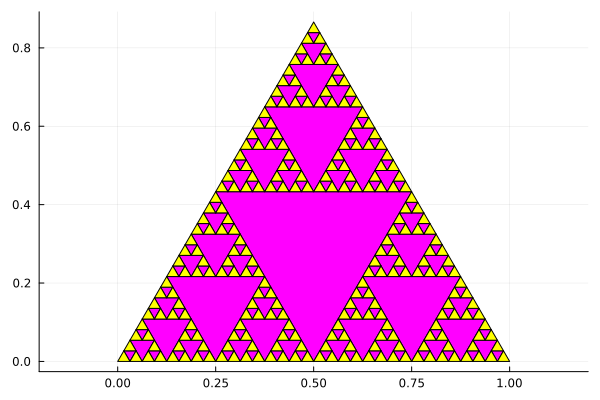

In [12]:

# Define the vertices of the initial equilateral triangle.
x_coords = [0.0, 1.0, 0.5]
y_coords = [0.0, 0.0, sqrt(3)/2]

# Initialize a blank plot with settings for a clean look.
my_plot = plot(aspect_ratio=:equal, legend=false)

# Start the recursion to populate the plot object.
# You can change the recursion level here!
drawTriangle!(my_plot, x_coords, y_coords, 5)

# Display the final plot.
my_plot

## A Classic Recursive Algorithm: Merge Sort

Merge sort is a highly efficient sorting algorithm and a perfect example of a **Divide and Conquer** strategy. It works in three steps:
1.  **Divide**: Break the unsorted array into two halves.
2.  **Conquer**: Recursively call merge sort on each half until you have arrays of size 1 (which are inherently sorted).
3.  **Combine**: Merge the two sorted halves back into one sorted array.

The method is illustrated below, for a simple test case with 7 elements:

<img src="merge_sort.png" width="50%">

*(Image from Wikipedia: https://en.wikipedia.org/wiki/Merge_sort)*

The core of the algorithm is the "Combine" step. We'll implement this in a helper function, `mergeLR!`, which takes two *already sorted* arrays (`L` and `R`) and merges them into a single sorted array `x`.

In [13]:
function mergeLR!(L, R, x)
    # i, j, and k are pointers for the left array, right array, and main array, respectively.
    i = j = k = 1
        
    # Walk through both halves, picking the smaller element to place into x.
    while i <= length(L) && j <= length(R)
        if L[i] < R[j]
            x[k] = L[i]
            i += 1
        else
            x[k] = R[j]
            j += 1
        end
        k += 1
    end

    # If one half runs out of elements first, copy the rest of the other half over.
    while i <= length(L)
        x[k] = L[i]
        i += 1
        k += 1
    end
    while j <= length(R)
        x[k] = R[j]
        j += 1
        k += 1
    end
end

mergeLR! (generic function with 1 method)

Now we can write the main `mergesort!` function. It will recursively split the array until the sub-arrays have only one element, then use `mergeLR!` to combine them on the way back up the call stack.

In [14]:
function mergesort!(x)
    # Base case: An array with 0 or 1 elements is already sorted.
    if length(x) <= 1
        return x
    else
        # DIVIDE: Find the middle of the array.
        mid = length(x) ÷ 2
        L = x[1:mid]
        R = x[mid+1:end]

        # CONQUER: Recursively sort both halves.
        mergesort!(L)
        mergesort!(R)
        
        # COMBINE: Merge the two sorted halves back into the original array reference.
        mergeLR!(L, R, x)
    end
end

mergesort! (generic function with 1 method)

In [15]:
# Example: Sort an array of 10 random integers.
x = rand(1:100, 10)
println("Unsorted: ", x)
mergesort!(x)
println("Sorted:   ", x)

Unsorted: [9, 89, 66, 82, 96, 45, 29, 69, 62, 80]
Sorted:   [9, 29, 45, 62, 66, 69, 80, 82, 89, 96]


Merge sort has a time complexity of $O(n \log n)$, which is very efficient for large datasets. This means that if you double the number of items, the time taken doesn't double, but grows slightly faster. Let's verify this behavior roughly with the `@time` macro.

In [16]:
# Run once on a small array to force JIT (Just-In-Time) compilation.
mergesort!(randn(1))

for n in Int64[1e3, 1e4, 1e5, 1e6, 1e7]
    x = rand(n) # Random floating point numbers
    print("n = ", n, ": \t")
    @time mergesort!(x)
end

n = 1000: 	  0.000081 seconds (4.00 k allocations: 194.953 KiB)
n = 10000: 	  0.000801 seconds (40.06 k allocations: 2.140 MiB)
n = 100000: 	  0.016266 seconds (400.51 k allocations: 23.986 MiB, 36.10% gc time)
n = 1000000: 	  0.222138 seconds (4.00 M allocations: 266.106 MiB, 46.72% gc time)
n = 10000000: 	  1.865873 seconds (40.07 M allocations: 2.830 GiB, 26.83% gc time)


As $n$ increases by a factor of 10, notice how the execution time increases by a factor slightly more than 10. This is consistent with the predicted $n \log n$ behavior, where the $\log n$ term adds that slightly-more-than-linear growth.

## Tracing Recursion by Capturing Intermediate Values

Sometimes, it's useful to track the sequence of return values from a recursive function. A great way to do this is with a *wrapper function* that manages a storage container, like an array.

Let's explore this with the quirky **McCarthy 91 function**:

$$
M(n) = 
\begin{cases}
n-10, & \text{if } n > 100 \\
M(M(n+11)), & \text{if } n \le 100
\end{cases}
$$

We'll define an outer function `Mvalues(n)` that initializes an empty array. Inside it, we'll define the recursive function `M(n)`. This inner function will be able to see and modify the array from the outer function's scope (this is called a *closure*). Each time `M(n)` returns, we'll save its result.

In [17]:
function Mvalues(n)
    # 1. Initialize an array in the outer function's scope.
    returned_values = Int64[]

    # 2. Define the recursive function internally.
    # It automatically has access to 'returned_values'.
    function M(n)
        if n > 100
            retval = n - 10
        else
            retval = M(M(n + 11))
        end
        
        # 3. Before returning, push the result to the captured array.
        push!(returned_values, retval)
        return retval
    end

    # 4. Kick off the recursion.
    M(n)
    
    # 5. Return the populated list of values.
    return returned_values
end

Mvalues (generic function with 1 method)

In [18]:
# The base case is hit immediately: M(105) = 95.
Mvalues(105)

1-element Vector{Int64}:
 95

In [19]:
# A more complex case. The final result is 91, but what was the path to get there?
# The output shows the sequence of returned values, from the innermost call outwards.
Mvalues(97)

9-element Vector{Int64}:
  98
  99
 100
 101
  91
  91
  91
  91
  91